In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing data

In [99]:
gdp_yearly = pd.read_excel('gdp_yearly.xlsx', sheet_name='clean', index_col=0)

In [100]:
gdp_yearly.head()

,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
Country,,,,,,,,,,
Belgium,36000,37000,38000,39100,40300,41700,40200,43700,48200,50600
Bulgaria,6100,6600,7100,7700,8400,9300,9500,11000,13300,14700
Czechia,15100,16200,17000,18700,20300,21700,21000,23400,26700,29200
Denmark,47100,47900,49300,51100,52000,53000,53500,59000,64700,63300
Germany,36100,37000,38100,39500,40600,42500,41500,44200,47200,49500


We need to transform the data into a short-form table:

In [101]:
gdp_yearly = gdp_yearly.melt(ignore_index=False, var_name='Year', value_name='GDP per Capita [EUR]').reset_index()
gdp_yearly.head()

,Country,Year,GDP per Capita [EUR]
0,Belgium,2014,36000
1,Bulgaria,2014,6100
2,Czechia,2014,15100
3,Denmark,2014,47100
4,Germany,2014,36100


Check for unfilled data:

In [119]:
gdp_yearly['GDP per Capita [EUR]'].value_counts()

GDP per Capita [EUR]
:        8
17300    5
9500     4
16200    4
11400    4
        ..
15600    1
40800    1
47300    1
67500    1
12100    1
Name: count, Length: 258, dtype: int64

We need to turn ':' into NaN

In [126]:
import numpy as np
def f(x):
    if x == ':':
        return np.NaN
    return x

In [124]:
gdp_yearly['GDP per Capita [EUR]'] = gdp_yearly['GDP per Capita [EUR]'].map(f)

In [125]:
gdp_yearly['GDP per Capita [EUR]'].value_counts()

GDP per Capita [EUR]
17300.0    5
9500.0     4
16200.0    4
11400.0    4
6400.0     3
          ..
15600.0    1
40800.0    1
47300.0    1
67500.0    1
12100.0    1
Name: count, Length: 257, dtype: int64

Looks good now. Let's get an overview:

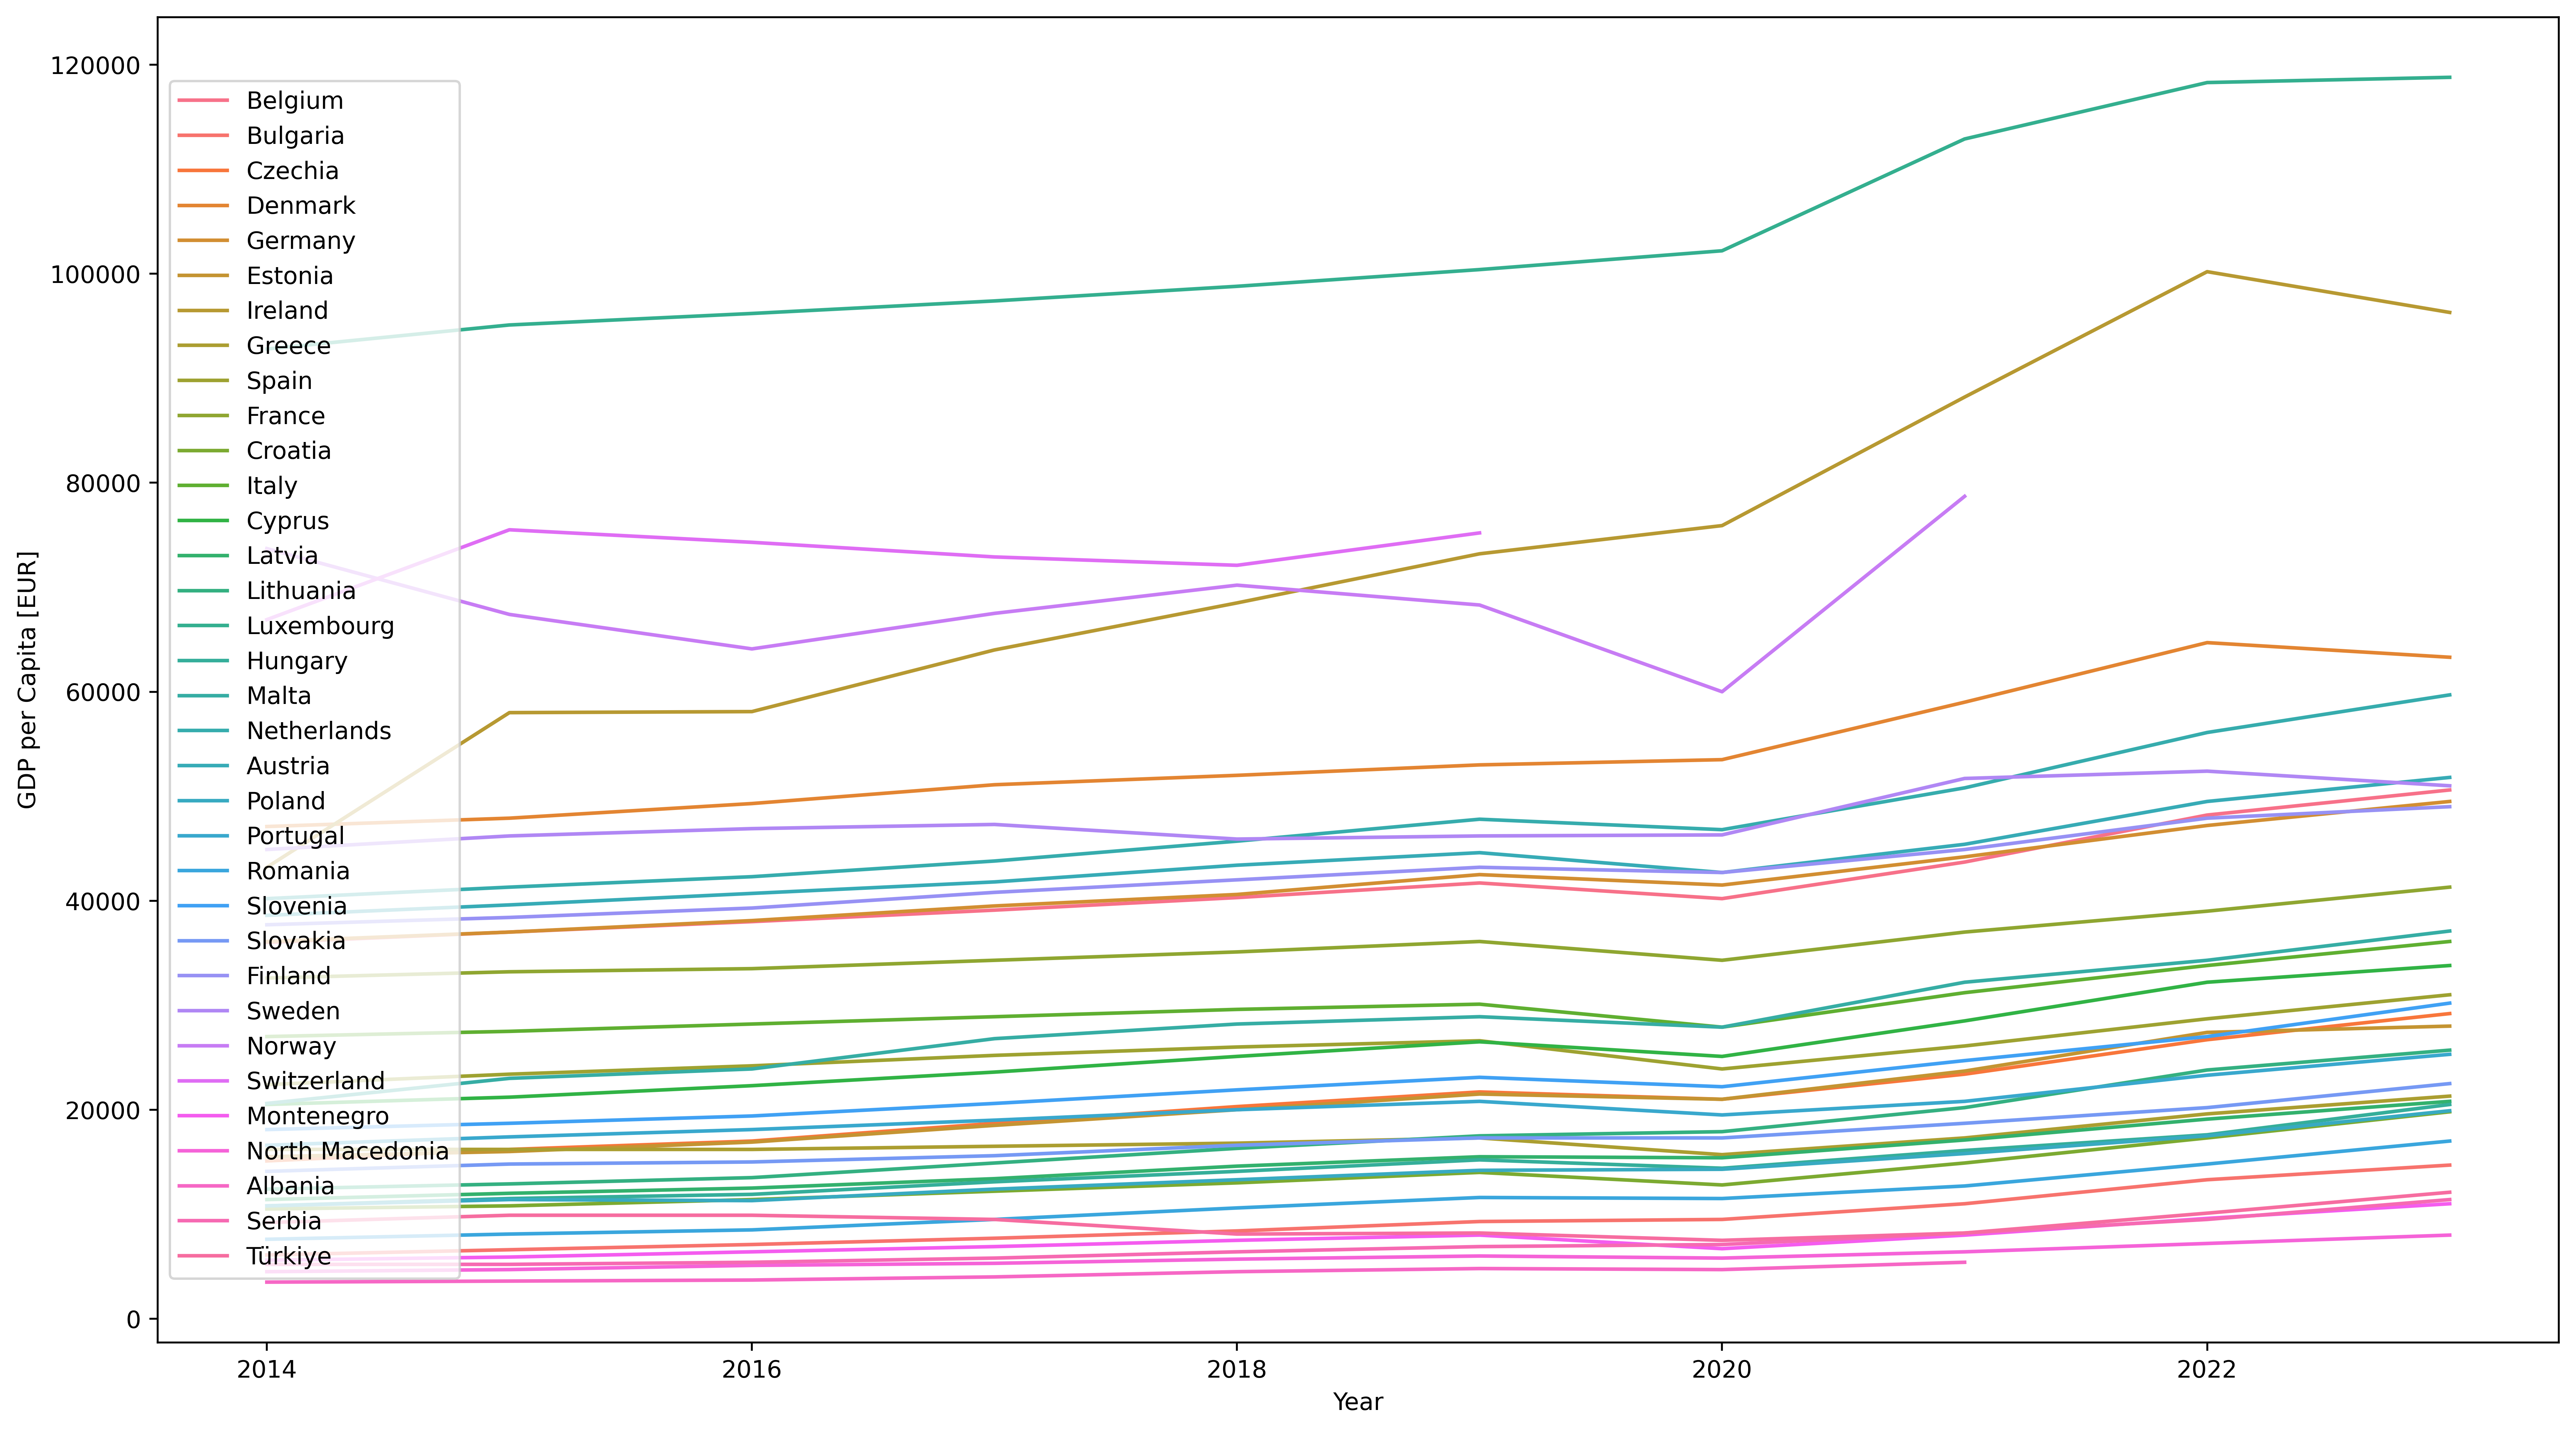

In [139]:
plt.figure(figsize=(18,10), dpi=500)
sns.lineplot(gdp_yearly, x='Year', y='GDP per Capita [EUR]', hue='Country')
plt.legend(loc='center left')

Let's check the data for 2023:

In [127]:
gdp_2023 = gdp_yearly[gdp_yearly['Year'] == 2023].drop(columns='Year')

In [128]:
gdp_2023.head()

,Country,GDP per Capita [EUR]
306,Belgium,50600.0
307,Bulgaria,14700.0
308,Czechia,29200.0
309,Denmark,63300.0
310,Germany,49500.0


Text(0.5, 1.0, '2023')

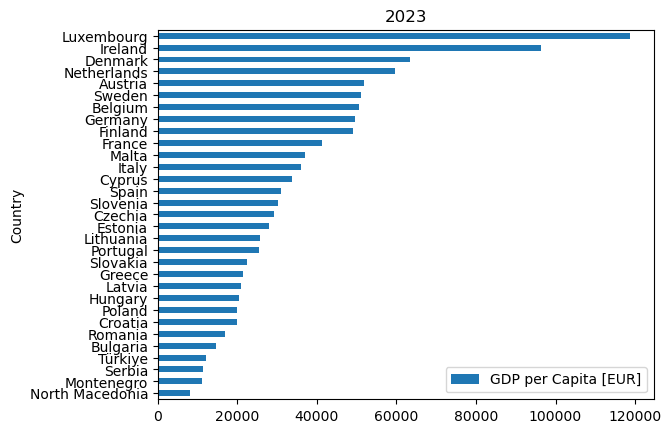

In [148]:
gdp_2023.dropna().sort_values(by='GDP per Capita [EUR]').plot(kind='barh', x='Country', y='GDP per Capita [EUR]')
plt.title('2023')

Interactive Map:

In [141]:
import plotly as py
import plotly.graph_objs as go
import plotly.express as px
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [149]:
init_notebook_mode(connected=True)

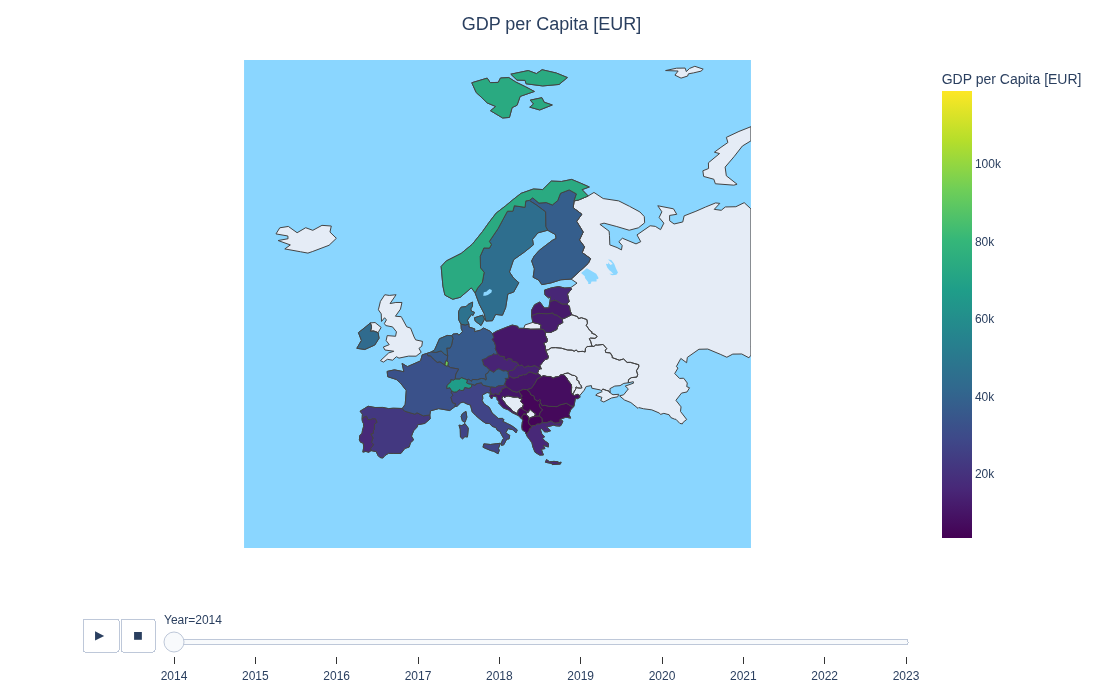

In [150]:
fig = px.choropleth(gdp_yearly,
    locations='Country',
    color='GDP per Capita [EUR]',
    locationmode='country names',
    animation_frame="Year",
)

fig.update_layout(
    title=dict(
        text='GDP per Capita [EUR]',
        x=.5,
        font_size=18,
        ),

    geo=dict(
        bgcolor='#8ad6ff',
        lakecolor='#8ad6ff',
        projection_type='miller',
        scope='europe'
        ),
    
    width = 700,
    height = 700,
    coloraxis=dict(colorscale='viridis',cmin=gdp_yearly['GDP per Capita [EUR]'].min(),cmax=gdp_yearly['GDP per Capita [EUR]'].max())
)

fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 200
fig.show()